In [1]:
import glob 
import numpy as np 
import os 
import shutil 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator,  load_img, img_to_array, array_to_img 
np.random.seed(42) 

import matplotlib.pyplot as plt 

In [2]:
IM_SHAPE=(224,224)

In [3]:
files= glob.glob('C:/Users/hecto/Downloads/MachineCrypto/Proyecto/dataset/Xray-covid/*')
files2=glob.glob('C:/Users/hecto/Downloads/MachineCrypto/Proyecto/dataset/Xray-sanos/*')

In [4]:
filesCOV= glob.glob('C:/Users/hecto/Downloads/MachineCrypto/Proyecto/CompleteDataset/Lung Segmentation Data/Lung Segmentation Data/ALL/COVID-19/*')
filesNOCOV=glob.glob('C:/Users/hecto/Downloads/MachineCrypto/Proyecto/CompleteDataset/Lung Segmentation Data/Lung Segmentation Data/ALL/Normal/images/*')


In [5]:
COVID_files = [fn for fn in files if 'covid' in fn] 
HEALTHY_files = [fn for fn in files2 if 'sanos' in fn] 

COVID = [fn for fn in filesCOV if 'covid' in fn] 
HEALTHY = [fn for fn in filesNOCOV if 'sano' in fn] 

len(COVID_files),len(HEALTHY_files),len(COVID), len(HEALTHY)

(132, 137, 11956, 10701)

In [6]:
COVID_train = np.random.choice(COVID_files, size=90, replace=False) 
HEALTHY_train = np.random.choice(HEALTHY_files, size=90, replace=False) 
COVID_files = list(set(COVID_files) - set(COVID_train)) 
HEALTHY_files = list(set(HEALTHY_files) - set(HEALTHY_train)) 
 
COVID_val = np.random.choice(COVID_files, size=40, replace=False) 
HEALTHY_val = np.random.choice(HEALTHY_files, size=40, replace=False) 
COVID_files = list(set(COVID_files) - set(COVID_val)) 
HEALTHY_files = list(set(HEALTHY_files) - set(HEALTHY_val)) 
 
#COVID_test = np.random.choice(COVID_files, size=12, replace=False) 
#HEALTHY_test = np.random.choice(HEALTHY_files, size=17, replace=False) 

COVID_val2 = np.random.choice(filesCOV, size=1000, replace=False) 
HEALTHY_val2 = np.random.choice(filesNOCOV, size=1000, replace=False) 
filesCOV = list(set(filesCOV) - set(COVID_val)) 
filesNOCOV = list(set(filesNOCOV) - set(HEALTHY_val)) 

print('COVID datasets:', COVID_train.shape, COVID_val.shape) 
print('HEALTHY datasets:', HEALTHY_train.shape, HEALTHY_val.shape,HEALTHY_val2.shape) 

COVID datasets: (90,) (40,)
HEALTHY datasets: (90,) (40,) (1000,)


In [7]:
train_dir = 'D:/dataset/DATAOG/training_data' 
val_dir = 'D:/dataset/DATAOG/validation_data' 
#test_dir = 'D:/dataset/DATAOG/test_data' 

val2_dir='D:/dataset/DATAOG/val2'
    
train_files = np.concatenate([COVID_train, HEALTHY_train]) 
validate_files = np.concatenate([COVID_val, HEALTHY_val]) 
#test_files = np.concatenate([COVID_test, HEALTHY_test])
val_files2=np.concatenate([COVID_val2,HEALTHY_val2])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None 
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None 
#os.mkdir(test_dir) if not os.path.isdir(test_dir) else None 
os.mkdir(val2_dir) if not os.path.isdir(val2_dir) else None
 
for fn in train_files: 
    shutil.copy(fn, train_dir) 
for fn in validate_files: 
    shutil.copy(fn, val_dir) 
#for fn in test_files: 
   # shutil.copy(fn, test_dir) 
for fn in val_files2:
    shutil.copy(fn, val2_dir)
 

In [8]:
IMG_DIM = IM_SHAPE
 
train_files = glob.glob('D:/dataset/DATAOG/training_data/*') 
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img  
              in train_files] 
train_imgs = np.array(train_imgs) 
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in 
                train_files] 
 
validation_files = glob.glob('D:/dataset/DATAOG/validation_data/*') 
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for 
                   img in validation_files] 
validation_imgs = np.array(validation_imgs) 
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in 
                     validation_files] 

validation2_files = glob.glob('D:/dataset/DATAOG/val2/*') 
validation2_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for 
                   img in val_files2] 
validation2_imgs = np.array(validation2_imgs) 
validation2_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in 
                     val_files2] 
 
print('Train dataset shape:', train_imgs.shape,  
      'Validation dataset shape:', validation_imgs.shape) 

Train dataset shape: (180, 224, 224, 3) Validation dataset shape: (80, 224, 224, 3)


In [9]:
len(validation_labels)

80

In [10]:
print(validation2_imgs.shape,len(validation2_labels))

(2000, 224, 224, 3) 2000


(224, 224, 3)


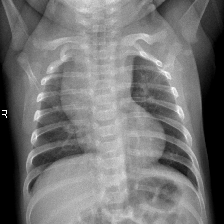

In [11]:
train_imgs_scaled = train_imgs.astype('float32') 
validation_imgs_scaled = validation_imgs.astype('float32') 
validation2_imgs_scaled=validation2_imgs.astype('float32')
train_imgs_scaled /= 255 
validation_imgs_scaled /= 255 
validation2_imgs_scaled /=255
# visualize a sample image 
print(train_imgs[0].shape) 
array_to_img(train_imgs[0]) 

In [12]:
for i in range(180):
    if train_labels[i].find("sano")==-1:
        train_labels[i]='covid'
    else :
        train_labels[i]='sano'
for i in range(80):
    if validation_labels[i].find("sano")==-1:
        validation_labels[i]='covid'
    else :
        validation_labels[i]='sano'
for i in range(2000):
    if validation2_labels[i].find("sano")==-1:
        validation2_labels[i]='covid'
    else :
        validation2_labels[i]='sano'        

In [13]:
train_labels[150]

'sano'

In [14]:
batch_size = 30 
num_classes = 2 
epochs = 30 
input_shape = (IM_SHAPE[0],IM_SHAPE[1], 3) 
 
# encode text category labels 
from sklearn.preprocessing import LabelEncoder 
 
le = LabelEncoder() 
le.fit(train_labels) 
train_labels_enc = le.transform(train_labels) 
validation_labels_enc = le.transform(validation_labels) 
validation_labels2_enc=le.transform(validation2_labels)
print(train_labels[190:195], train_labels_enc[195:200]) 

[] []


In [15]:
train_labels[150]

'sano'

In [16]:
from keras.applications import MobileNet 
from keras.models import Model 
import keras 
 
vgg = MobileNet(include_top=False, weights='imagenet',  
                                     input_shape=input_shape) 

# we have removed the final part of the classifier pertaining to the VGG-16 model 
#since we will be building our own classifier and leveraging VGG as a feature extractor
output = vgg.layers[-1].output 
output = keras.layers.Flatten()(output) 
vgg_model = Model(vgg.input, output) 
vgg_model.trainable = False 
 
for layer in vgg_model.layers: 
    layer.trainable = False 

vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [17]:
# To verify that the layers of the VGG-16 model are frozen, we can use the following code:
import pandas as pd 
pd.set_option('max_colwidth', -1) 
 
layers = [(layer, layer.name, layer.trainable) for layer in 
           vgg_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\hecto\AppData\Local\Temp\ipykernel_10592\1885812186.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x00000214FE8E8EB0>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x00000214EDE51550>,conv1,False
2,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000214EDE51CD0>,conv1_bn,False
3,<keras.layers.activation.relu.ReLU object at 0x00000214EDE517C0>,conv1_relu,False
4,<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x00000215987C0DF0>,conv_dw_1,False
...,...,...,...
82,<keras.layers.activation.relu.ReLU object at 0x000002159EC74280>,conv_dw_13_relu,False
83,<keras.layers.convolutional.conv2d.Conv2D object at 0x000002159EC76100>,conv_pw_13,False
84,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002159EC7FA30>,conv_pw_13_bn,False
85,<keras.layers.activation.relu.ReLU object at 0x000002159EC72AF0>,conv_pw_13_relu,False


In [18]:
print("Trainable layers:", vgg_model.trainable_weights)


Trainable layers: []


1/1 [==============================] - 1s 1s/step
(1, 7, 7, 1024)


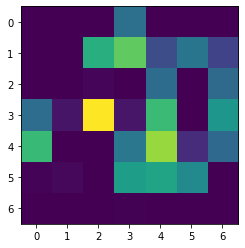

In [19]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape) 
plt.imshow(bottleneck_feature_example[0][:,:,0]) 

In [20]:
def get_bottleneck_features(model, input_imgs): 
    features = model.predict(input_imgs, verbose=0) 
    return features 

train_features_vgg = get_bottleneck_features(vgg_model, 
                                             train_imgs_scaled) 
validation_features_vgg = get_bottleneck_features(vgg_model,      
                                                validation_imgs_scaled) 

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape) 

Train Bottleneck Features: (180, 50176) 	Validation Bottleneck Features: (80, 50176)


In [21]:
validation_features_vgg2=get_bottleneck_features(vgg_model,validation2_imgs_scaled)

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [23]:
X_train=train_features_vgg
y_train=train_labels_enc
X_valid=validation_features_vgg
y_valid=validation_labels_enc


In [24]:
X_valid2=validation_features_vgg2
y_valid2=validation_labels2_enc

In [25]:
scores = cross_validate(BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=5
), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
#print("%0.2f accuracy with a standard deviation of %0.2f"  (scores.mean(), scores.std()))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  1.0175121307373047
Accuracy:  0.9444444444444444
Recall:  0.9666666666666666
Precision:  0.9338888888888889
F1-score:  0.9470489950366112


In [26]:
scores = cross_validate(RandomForestClassifier(n_estimators=5), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
#print("%0.2f accuracy with a standard deviation of %0.2f"  (scores.mean(), scores.std()))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  0.030982208251953126
Accuracy:  0.9166666666666666
Recall:  0.9111111111111112
Precision:  0.9307070707070707
F1-score:  0.9158083935328518


In [27]:
scores = cross_validate(XGBClassifier(), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
#print("%0.2f accuracy with a standard deviation of %0.2f"  (scores.mean(), scores.std()))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  2.895485687255859
Accuracy:  0.95
Recall:  1.0
Precision:  0.9261038961038961
F1-score:  0.9577345537757438


In [28]:
scores = cross_validate(LGBMClassifier(n_estimators=1000,class_weight='balanced',
                                       reg_alpha=0.1,reg_lambda=0.1,
                                       learning_rate=0.001,num_leaves=400,boosting='dart'
), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boostin

In [29]:
scores = cross_validate(AdaBoostClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=300
), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  0.45738379955291747
Accuracy:  0.888888888888889
Recall:  0.9
Precision:  0.8943434343434344
F1-score:  0.8900730994152047


In [30]:
scores = cross_validate(DecisionTreeClassifier(), X_train ,y_train, cv=10,scoring=('accuracy','recall','precision','f1'))
print('Tiempo de entrenamiento: ',scores['fit_time'].mean())
print('Accuracy: ',scores['test_accuracy'].mean())
print('Recall: ',scores['test_recall'].mean())
print('Precision: ',scores['test_precision'].mean())
print('F1-score: ',scores['test_f1'].mean())

Tiempo de entrenamiento:  0.4210346698760986
Accuracy:  0.8833333333333332
Recall:  0.9
Precision:  0.8868686868686868
F1-score:  0.8868954248366012


In [31]:
hist=BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=5
)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[ 18 982]
 [158 842]]
Accuracy:  0.43
Recall:  0.842
Precision:  0.4616228070175439
F1-score:  0.5963172804532578


In [32]:
hist=RandomForestClassifier(n_estimators=5)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[ 32 968]
 [154 846]]
Accuracy:  0.439
Recall:  0.846
Precision:  0.4663726571113561
F1-score:  0.6012793176972281


In [33]:
hist=XGBClassifier()
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[  4 996]
 [144 856]]
Accuracy:  0.43
Recall:  0.856
Precision:  0.46220302375809935
F1-score:  0.6002805049088359


In [34]:
hist=LGBMClassifier(n_estimators=1000,class_weight='balanced',
                                       reg_alpha=0.1,reg_lambda=0.1,
                                       learning_rate=0.001,num_leaves=400,boosting='dart'
)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[[ 30 970]
 [180 820]]
Accuracy:  0.425
Recall:  0.82
Precision:  0.4581005586592179
F1-score:  0.5878136200716846


In [35]:
hist=AdaBoostClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=300
)
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[ 32 968]
 [178 822]]
Accuracy:  0.427
Recall:  0.822
Precision:  0.4592178770949721
F1-score:  0.589247311827957


In [36]:
hist=DecisionTreeClassifier()
hist.fit(X_train,y_train)
cm2 = confusion_matrix(y_valid2,hist.predict(X_valid2))
print(cm2)
acc=accuracy_score(y_valid2, hist.predict(X_valid2))
print("Accuracy: ",(acc))
recall=recall_score(y_valid2, hist.predict(X_valid2))
print("Recall: ",(recall))
prec=precision_score(y_valid2,hist.predict(X_valid2))
print("Precision: ",(prec))
f1=f1_score(y_valid2,hist.predict(X_valid2))
print("F1-score: ",(f1))

[[ 95 905]
 [274 726]]
Accuracy:  0.4105
Recall:  0.726
Precision:  0.4451256897608829
F1-score:  0.5518814139110604
